In [34]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from vampyr import vampyr1d as vp1
from vampyr import vampyr2d as vp2
from vampyr import vampyr3d as vp3
from plotter import grid_plotter

MRA = vp3.MultiResolutionAnalysis(box=[-16, 16], order=5)
prec = 1.0e-3
P_eps = vp3.ScalingProjector(MRA, prec)

b = 0.5
a = (b/np.pi)**(3./2.)
center = [2.0, 0.0, 0.0]
power = [0, 0, 0]
wideG = vp3.GaussFunc(b, a, center, power)

b = 1.0
a = (b/np.pi)**(3./2.)
center = [-2.0, 0.0, 0.0]
power = [0, 0, 0]
narrowG = vp3.GaussFunc(b, a, center, power)

wideG_tree = P_eps(wideG)
narrowG_tree = P_eps(narrowG)

sum_tree = wideG_tree + narrowG_tree

In [35]:
print(wideG_tree)
print(narrowG_tree)
print(sum_tree)


*FunctionTree: nn
  genNodes: 0
  square norm: 0.0224484
  root scale: -4
  order: 5
  nodes: 520
  endNodes: 456
  nodes per scale: 
    scale=-4  nodes=8
    scale=-3  nodes=64
    scale=-2  nodes=64
    scale=-1  nodes=384


*FunctionTree: nn
  genNodes: 0
  square norm: 0.0634936
  root scale: -4
  order: 5
  nodes: 296
  endNodes: 260
  nodes per scale: 
    scale=-4  nodes=8
    scale=-3  nodes=64
    scale=-2  nodes=64
    scale=-1  nodes=96
    scale=0  nodes=64


*FunctionTree: nn
  genNodes: 0
  square norm: 0.0862757
  root scale: -4
  order: 5
  nodes: 616
  endNodes: 540
  nodes per scale: 
    scale=-4  nodes=8
    scale=-3  nodes=64
    scale=-2  nodes=64
    scale=-1  nodes=416
    scale=0  nodes=64



(<Figure size 900x900 with 1 Axes>, <Axes3DSubplot:>)

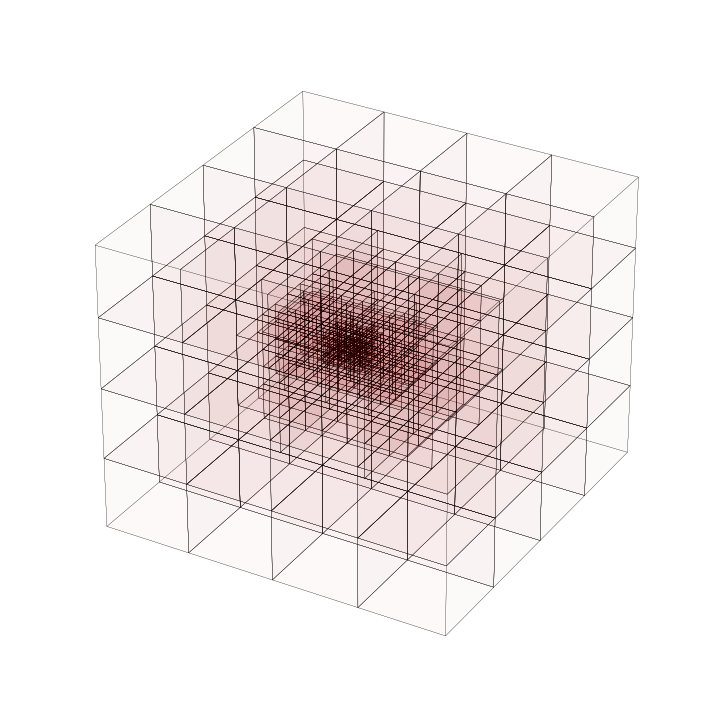

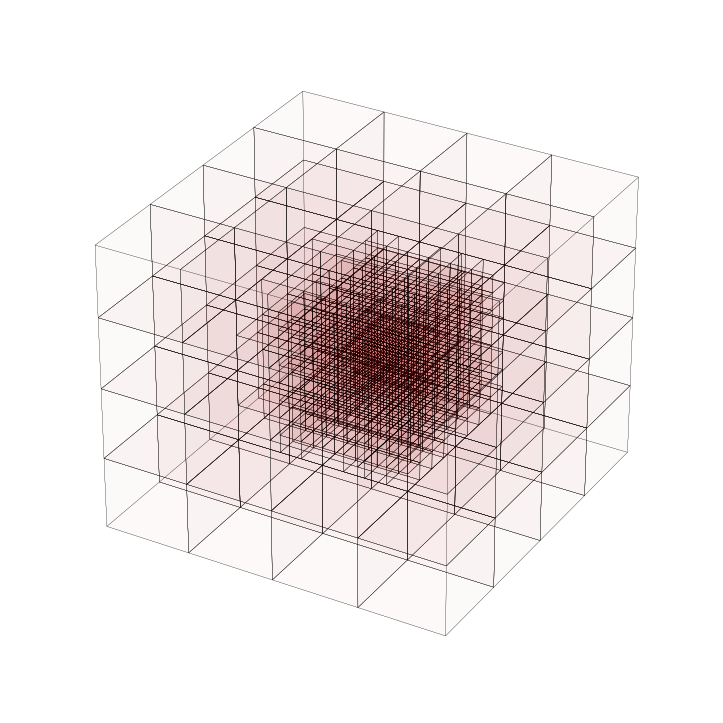

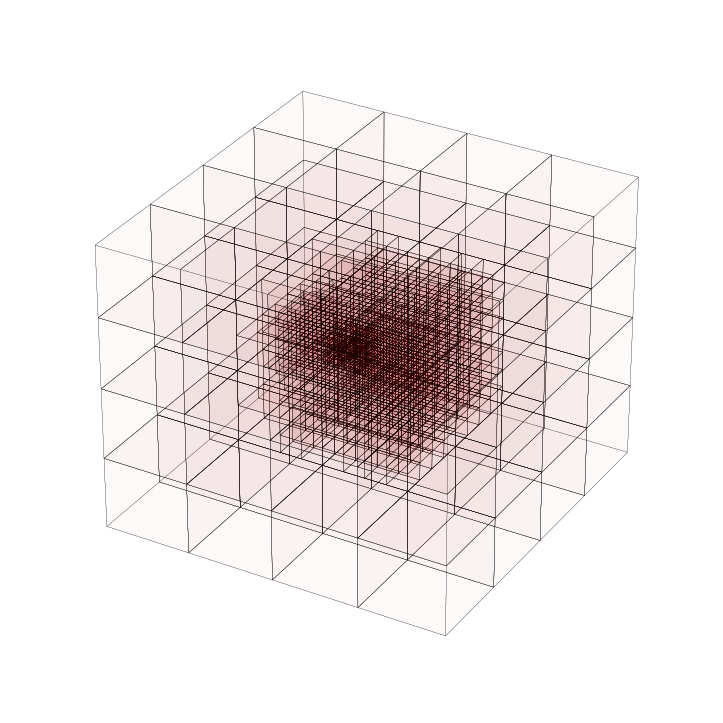

In [36]:
from plotter import grid_plotter
grid_plotter(narrowG_tree)
grid_plotter(wideG_tree)
grid_plotter(sum_tree)


*FunctionTree: nn
  genNodes: 0
  square norm: 3.24773e-09
  root scale: -4
  order: 5
  nodes: 4936
  endNodes: 4320
  nodes per scale: 
    scale=-4  nodes=8
    scale=-3  nodes=64
    scale=-2  nodes=512
    scale=-1  nodes=512
    scale=0  nodes=3328
    scale=1  nodes=512


*FunctionTree: nn
  genNodes: 0
  square norm: 3.24773e-09
  root scale: -4
  order: 5
  nodes: 296
  endNodes: 260
  nodes per scale: 
    scale=-4  nodes=8
    scale=-3  nodes=64
    scale=-2  nodes=64
    scale=-1  nodes=64
    scale=0  nodes=96



(<Figure size 900x900 with 1 Axes>, <Axes3DSubplot:>)

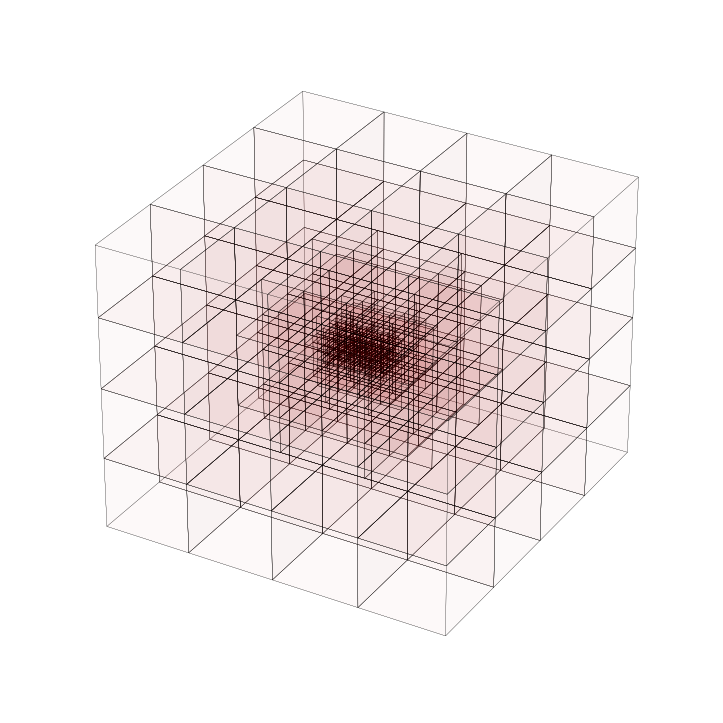

In [37]:
prod_tree = wideG_tree * narrowG_tree
print(prod_tree)
prod_tree.crop(0.1*prec)
print(prod_tree)
grid_plotter(prod_tree)

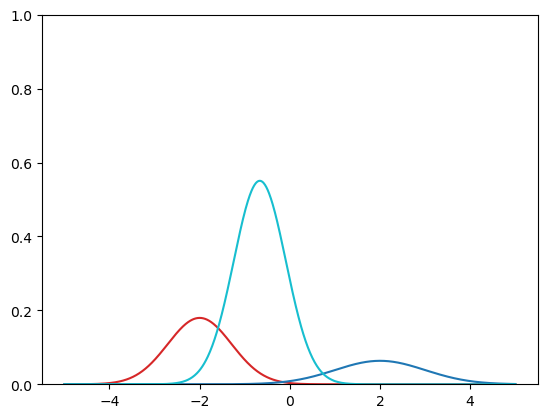

In [61]:
import matplotlib.pyplot as plt
x_vec = np.linspace(-5,5,1001)
y1_vec = np.array([narrowG_tree([x,0.0,0.0]) for x in x_vec ])
y2_vec = np.array([wideG_tree([x,0.0,0.0]) for x in x_vec ])
y3_vec = np.array([sum_tree([x,0.0,0.0]) for x in x_vec ])
y4_vec = np.array([prod_tree([x,0.0,0.0]) for x in x_vec ])
plt.plot(x_vec, y1_vec, "tab:red") # potential from narrow Gaussian
plt.plot(x_vec, y2_vec, "tab:blue") # potential from wide Gaussian
#plt.plot(x_vec, y3_vec, "tab:green") # point charge potential
plt.plot(x_vec, 10000 * y4_vec, "tab:cyan") # point charge potential
plt.ylim(0.0,1.0)
plt.show()